In [1]:
import json
import numpy as np
from Necessary_functions import *



file_name = "H2_data_qedfci_pqed_pqed_minimal.json"
# Load the molecule data from the JSON file
with open(file_name, 'r') as json_file:
    molecule_data = json.load(json_file)



# Extract values from the loaded JSON data into Python variables
molecule_name = molecule_data["molecule_data"]["molecule_name"]
mA_au = molecule_data["molecule_data"]["mA_au"]
mB_au = molecule_data["molecule_data"]["mB_au"]
mu_au = molecule_data["molecule_data"]["mu_au"]
bondlength_scan_vals = np.array(molecule_data["molecule_data"]["bondlength_scan_vals"])
omega = molecule_data["molecule_data"]["omega"]
CI_Level = molecule_data["molecule_data"]["CI_Level"]
n_photon_basis_states = molecule_data["molecule_data"]["n_photon_basis_states"]
basis_set = molecule_data["molecule_data"]["basis_set"]
ci_info = molecule_data["molecule_data"]["ci_info"]
pqed_info = molecule_data["molecule_data"]["pqed_info"]
pqed_minimal_info = molecule_data["molecule_data"]["pqed_minimal_info"]
lambda_values = np.array(molecule_data["lambda_values"])

qed_ci = np.array(molecule_data["qed-ci"])
pqed_minimal = np.array(molecule_data["pqed_minimal"])
pqed = np.array(molecule_data["pqed_data"])

ci_lp_index = ci_info["lower_polariton_index"]
ci_up_index = ci_info["upper_polariton_index"]

pqed_lp_index = pqed_info["lower_polariton_index"]
pqed_up_index = pqed_info["upper_polariton_index"]

pqed_minimal_lp_index = pqed_minimal_info["lower_polariton_index"]
pqed_minimal_up_index = pqed_minimal_info["upper_polariton_index"]


# Print the extracted variables
print("Molecule Name:", molecule_name)
print("Mass A (au):", mA_au)
print("Mass B (au):", mB_au)
print("Reduced Mass (mu_au):", mu_au)
print("Bond Length Scan Values:", bondlength_scan_vals)
print("Omega:", omega)
print("CI Level:", CI_Level)
print("Number of Photon Basis States:", n_photon_basis_states)
print("Basis Set:", basis_set)
print("CI Info:", ci_info)
print("PQED Info:", pqed_info)
print("PQED Minimal Info:", pqed_minimal_info)
print("Lambda Values:", lambda_values)
print("QED-CASCI:", qed_ci)
print("PQED Minimal:", pqed_minimal)



Molecule Name: H2
Mass A (au): 1837.1527318119486
Mass B (au): 1837.1527318119486
Reduced Mass (mu_au): 918.5763659059743
Bond Length Scan Values: [0.25       0.26767677 0.28535354 0.3030303  0.32070707 0.33838384
 0.35606061 0.37373737 0.39141414 0.40909091 0.42676768 0.44444444
 0.46212121 0.47979798 0.49747475 0.51515152 0.53282828 0.55050505
 0.56818182 0.58585859 0.60353535 0.62121212 0.63888889 0.65656566
 0.67424242 0.69191919 0.70959596 0.72727273 0.74494949 0.76262626
 0.78030303 0.7979798  0.81565657 0.83333333 0.8510101  0.86868687
 0.88636364 0.9040404  0.92171717 0.93939394 0.95707071 0.97474747
 0.99242424 1.01010101 1.02777778 1.04545455 1.06313131 1.08080808
 1.09848485 1.11616162 1.13383838 1.15151515 1.16919192 1.18686869
 1.20454545 1.22222222 1.23989899 1.25757576 1.27525253 1.29292929
 1.31060606 1.32828283 1.3459596  1.36363636 1.38131313 1.3989899
 1.41666667 1.43434343 1.4520202  1.46969697 1.48737374 1.50505051
 1.52272727 1.54040404 1.55808081 1.57575758 1.593

# Read QED-TDDFT Data

In [2]:
h2_tddft_pes = np.loadtxt("H2/H2_PBE.txt")

# tddft S0 and S1
tddft_S0 = h2_tddft_pes[:,1]
tddft_S1 = h2_tddft_pes[:,2]

# qed-tddft lz = 0.01 data
tddft_lp_lz_p01 = h2_tddft_pes[:,4]
tddft_up_lz_p01 = h2_tddft_pes[:,5]

# qed-tddft lz = 0.05 data
tddft_lp_lz_p05 = h2_tddft_pes[:,12]
tddft_up_lz_p05 = h2_tddft_pes[:,13]

# qed-tddft lz = 0.1 data
tddft_lp_lz_p1 = h2_tddft_pes[:,14]
tddft_up_lz_p1 = h2_tddft_pes[:,15]

(10, 100, 10)
(10, 100, 10)
(10, 100, 10)


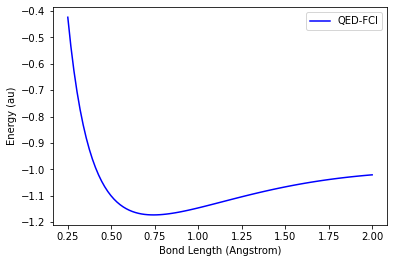

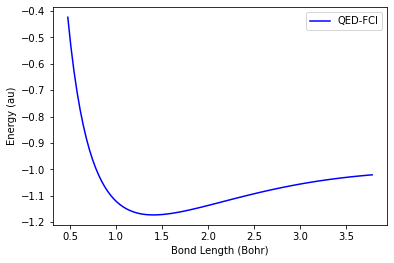

In [3]:
#qed_ci = np.array(molecule_data["qed-ci"])
#pqed_minimal = np.array(molecule_data["pqed_minimal"])
#pqed = np.array(molecule_data["pqed_data"])
print(np.shape(qed_ci))
print(np.shape(pqed_minimal))
print(np.shape(pqed))


plt.plot(bondlength_scan_vals, qed_ci[0,:,0], label='QED-FCI', color='blue')
#plt.plot(bondlength_scan_vals, pqed_minimal[0,:,1], label='pQED(min)', color='red', linestyle='--')
#plt.plot(bondlength_scan_vals, pqed[0,:,1], label='pQED', color='green', linestyle=':')
#plt.plot(bondlength_scan_vals, qed_ci[0,:,1], label='QED-FCI', color='blue')
#plt.plot(bondlength_scan_vals, pqed_minimal[0,:,1], label='pQED(min)', color='red', linestyle='--')
#plt.plot(bondlength_scan_vals, pqed[0,:,1], label='pQED', color='green', linestyle=':')
plt.xlabel('Bond Length (Angstrom)')
plt.ylabel('Energy (au)')
plt.legend()
plt.show()

# store the bondlength scan values in an array in Bohr units
bondlength_scan_vals_bohr = bondlength_scan_vals / 0.52917721067

# now plot in Bohr units
plt.plot(bondlength_scan_vals_bohr, qed_ci[0,:,0], label='QED-FCI', color='blue')
plt.xlabel('Bond Length (Bohr)')
plt.ylabel('Energy (au)')
plt.legend()
plt.show()

# store qed_ci_[0,:,0] in a numpy array
qed_ci_0_0 = np.array(qed_ci[0,:,0]) 

In [4]:
print((0.01898106099719188 - 0.01893711881314708)/ 0.01893711881314708 * 100)

0.23204260626115739


H2
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


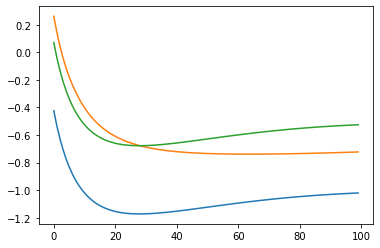

In [5]:

with open("Uncoupled_molecules_data.json", 'r') as json_file:
    molecule_data_uncoupled_1_photon = json.load(json_file)
molecule_name = file_name.split('_')[0]
print(molecule_name)
molecule_data_uncoupled_1_photon = np.array(molecule_data_uncoupled_1_photon[molecule_name]["Uncoupled_Surfaces"])
plt.plot(molecule_data_uncoupled_1_photon)

#fit in the data into pqed minimal, pqed , qed-ci, 

no_coupling_pqed = np.zeros_like(pqed[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed= pqed.tolist()
pqed.insert(0, no_coupling_pqed.tolist())  
pqed = np.array(pqed)



# not very clear which one should be lp and which should be up
no_coupling_pqed = np.zeros_like(pqed_minimal[0])
no_coupling_pqed[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_pqed[:, pqed_minimal_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_pqed[:, pqed_minimal_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

pqed_minimal= pqed_minimal.tolist()
pqed_minimal.insert(0, no_coupling_pqed.tolist())  
pqed_minimal = np.array(pqed_minimal)


no_coupling_qed_ci= np.zeros_like(qed_ci[0])
no_coupling_qed_ci[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_qed_ci[:, ci_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_qed_ci[:, ci_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

qed_ci= qed_ci.tolist()
qed_ci.insert(0, no_coupling_qed_ci.tolist())  
qed_ci= np.array(qed_ci)

lambda_values = lambda_values.tolist()
lambda_values.insert(0, 0.0)
lambda_values = np.array(lambda_values)
print(lambda_values)


In [6]:
print(lambda_values)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


# Plots of PES

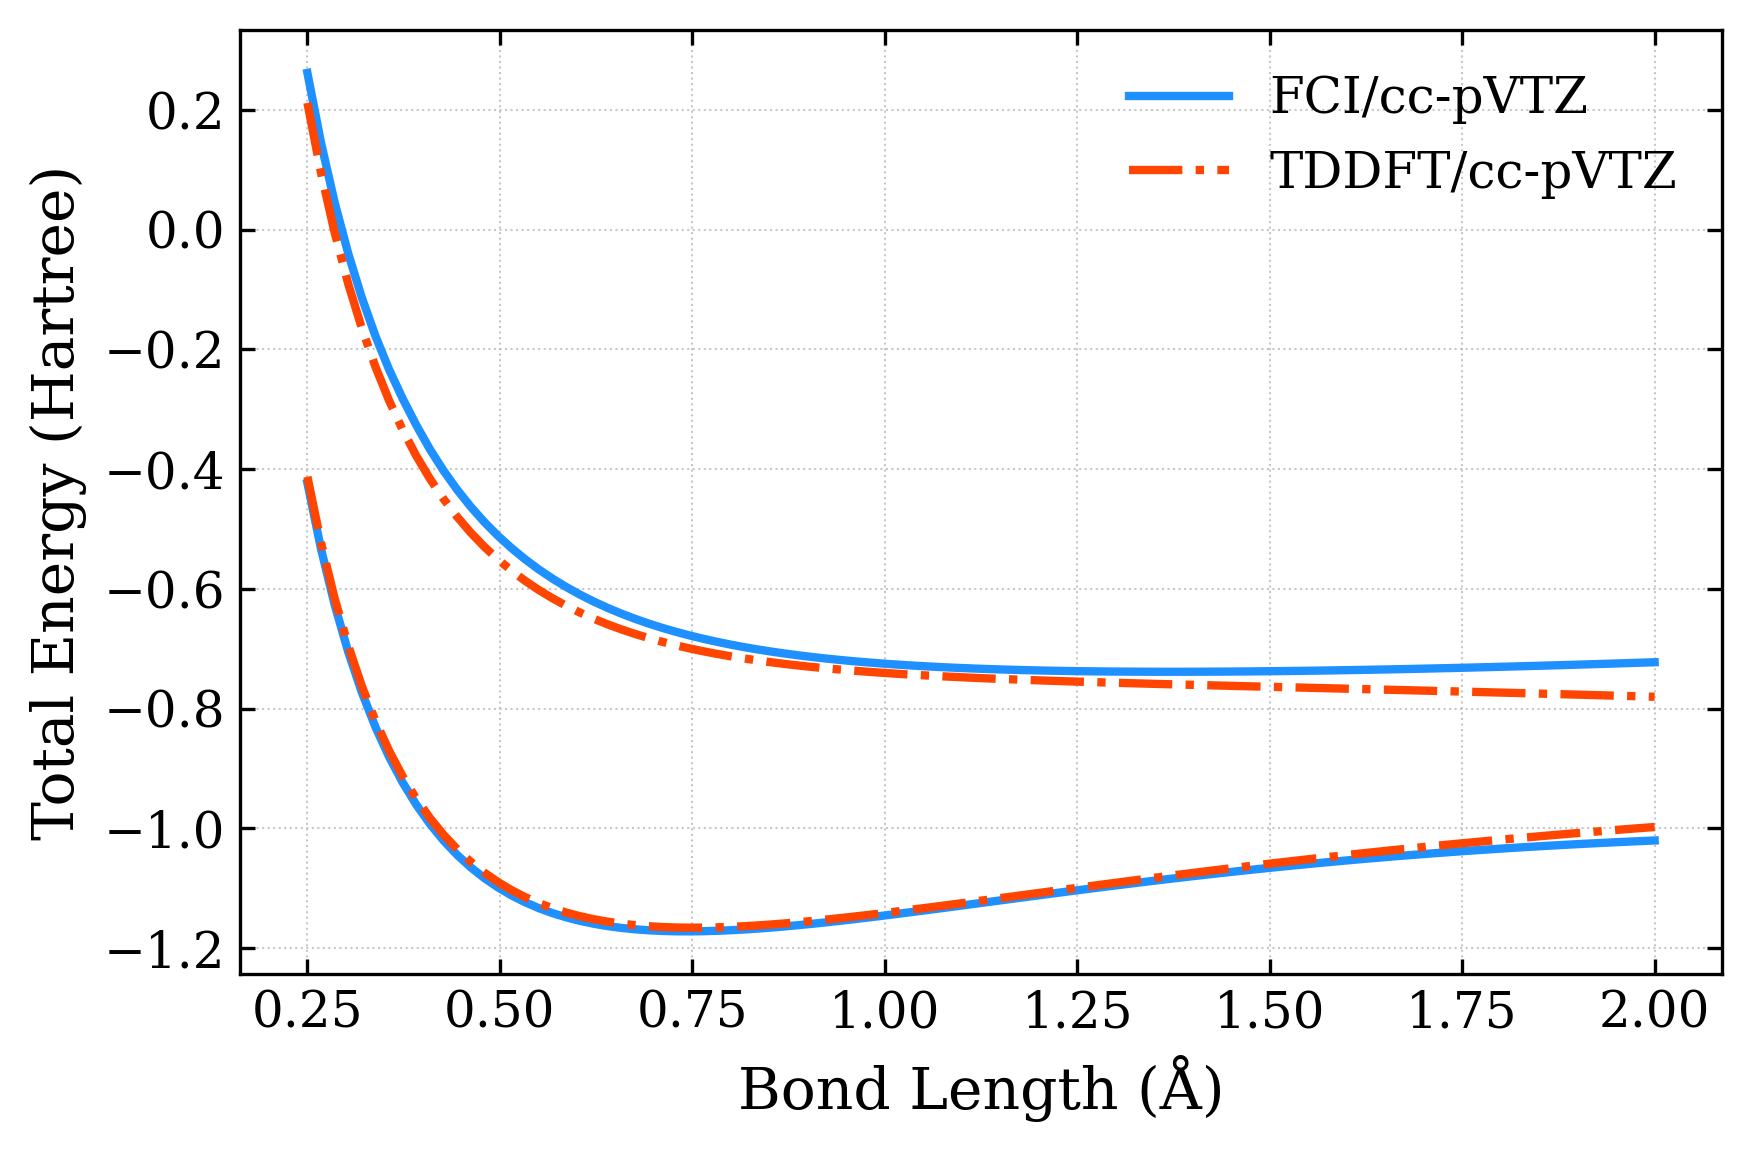

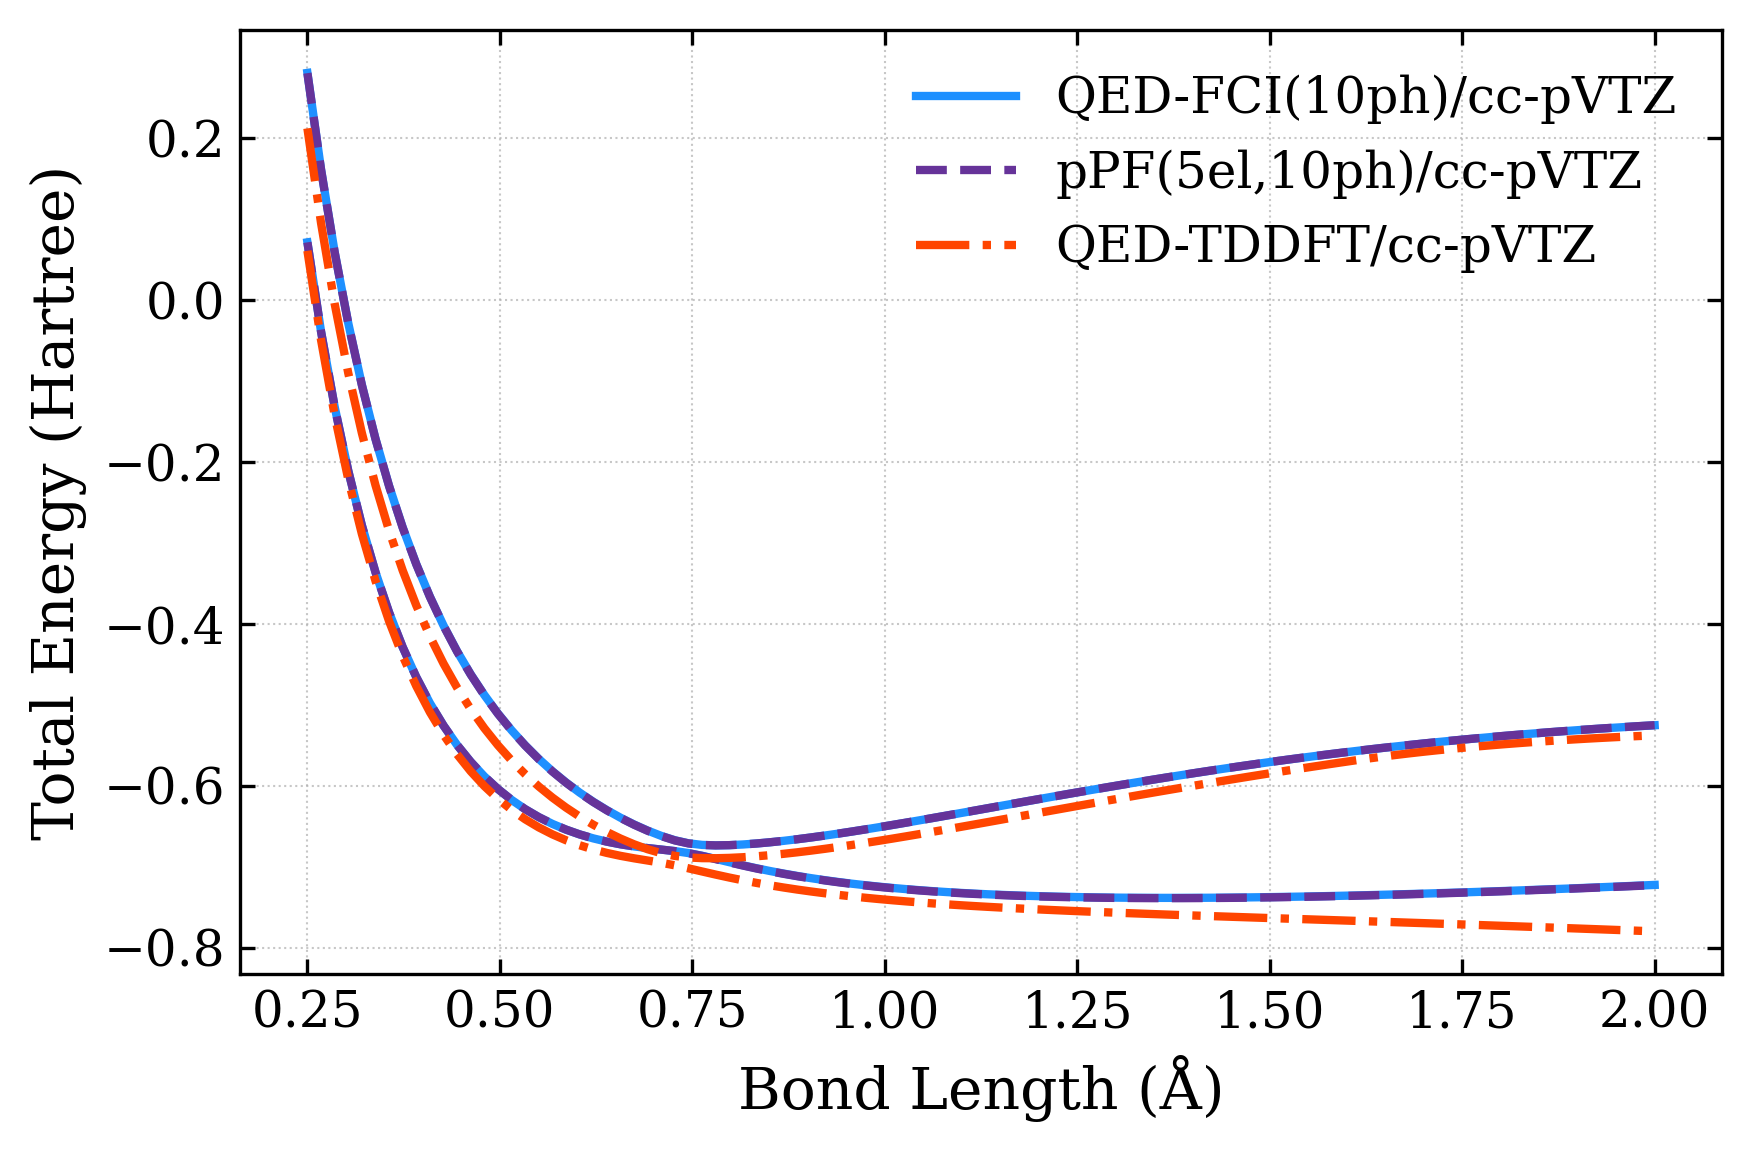

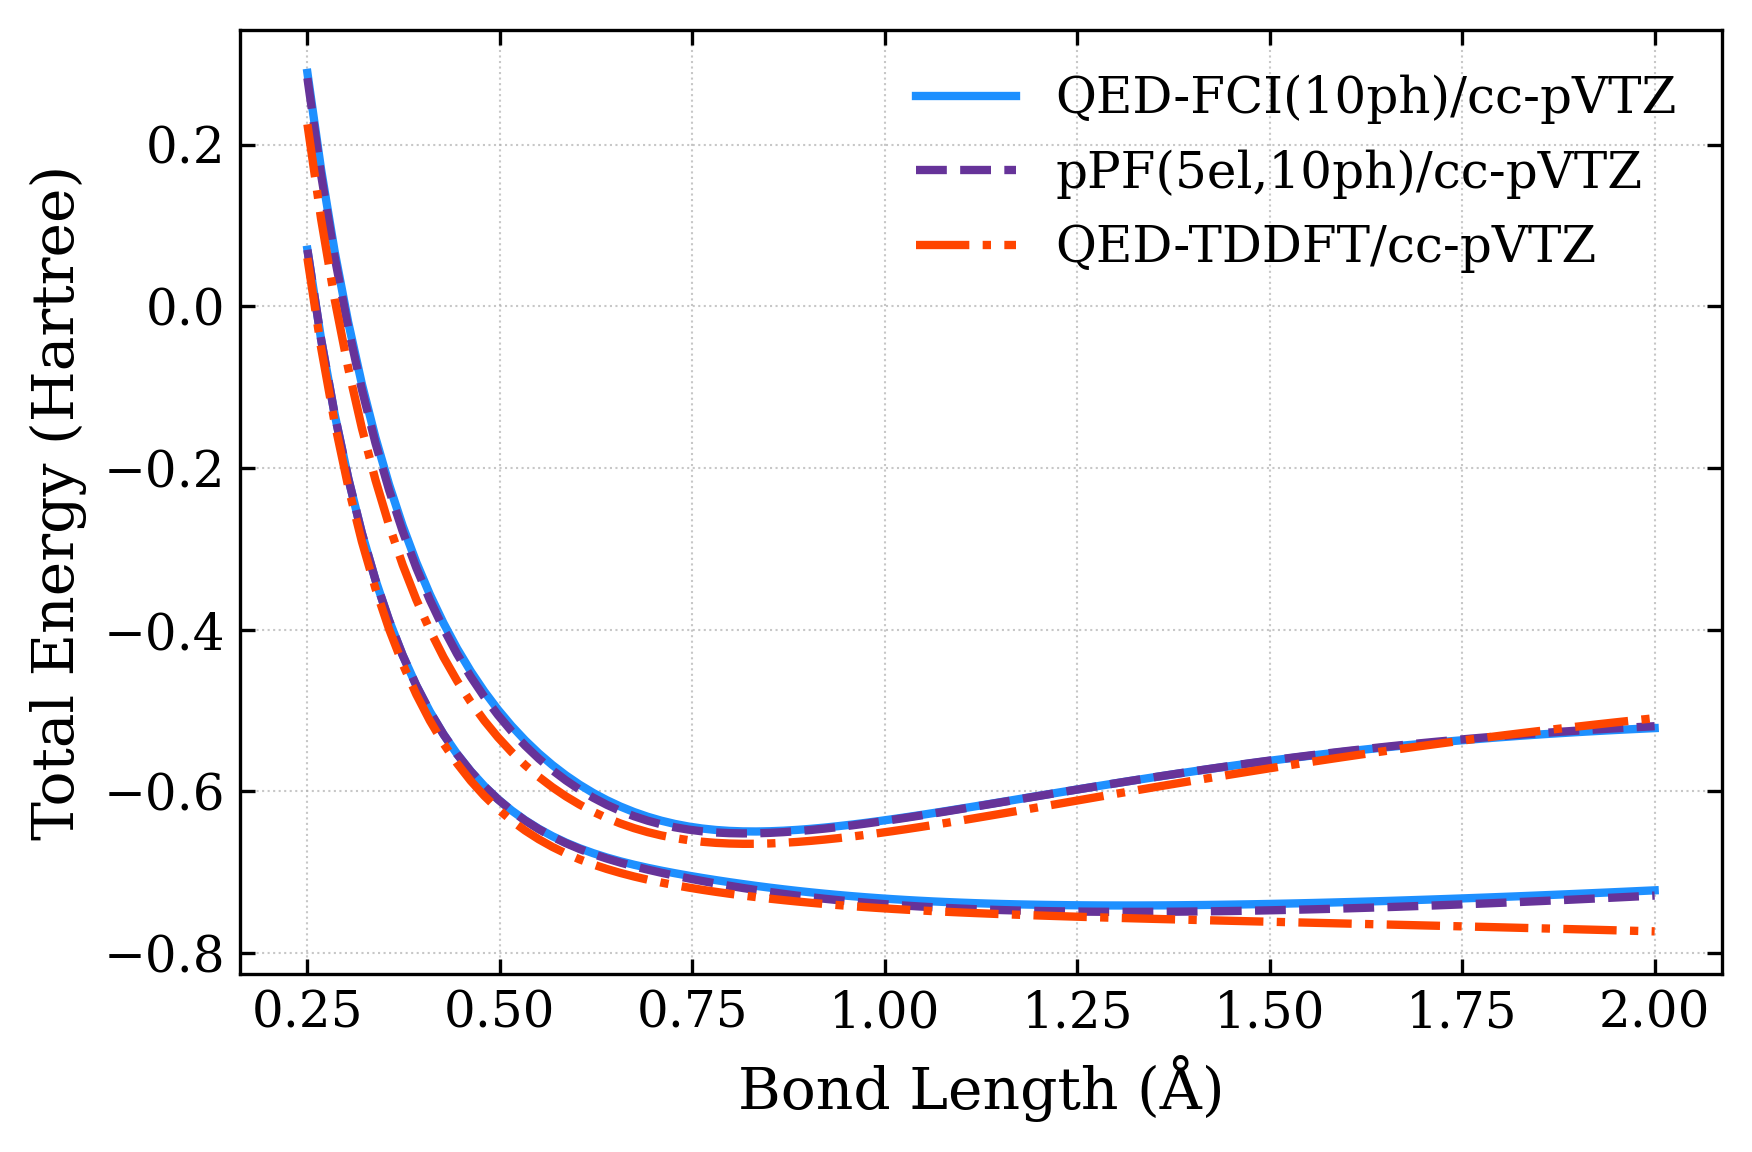

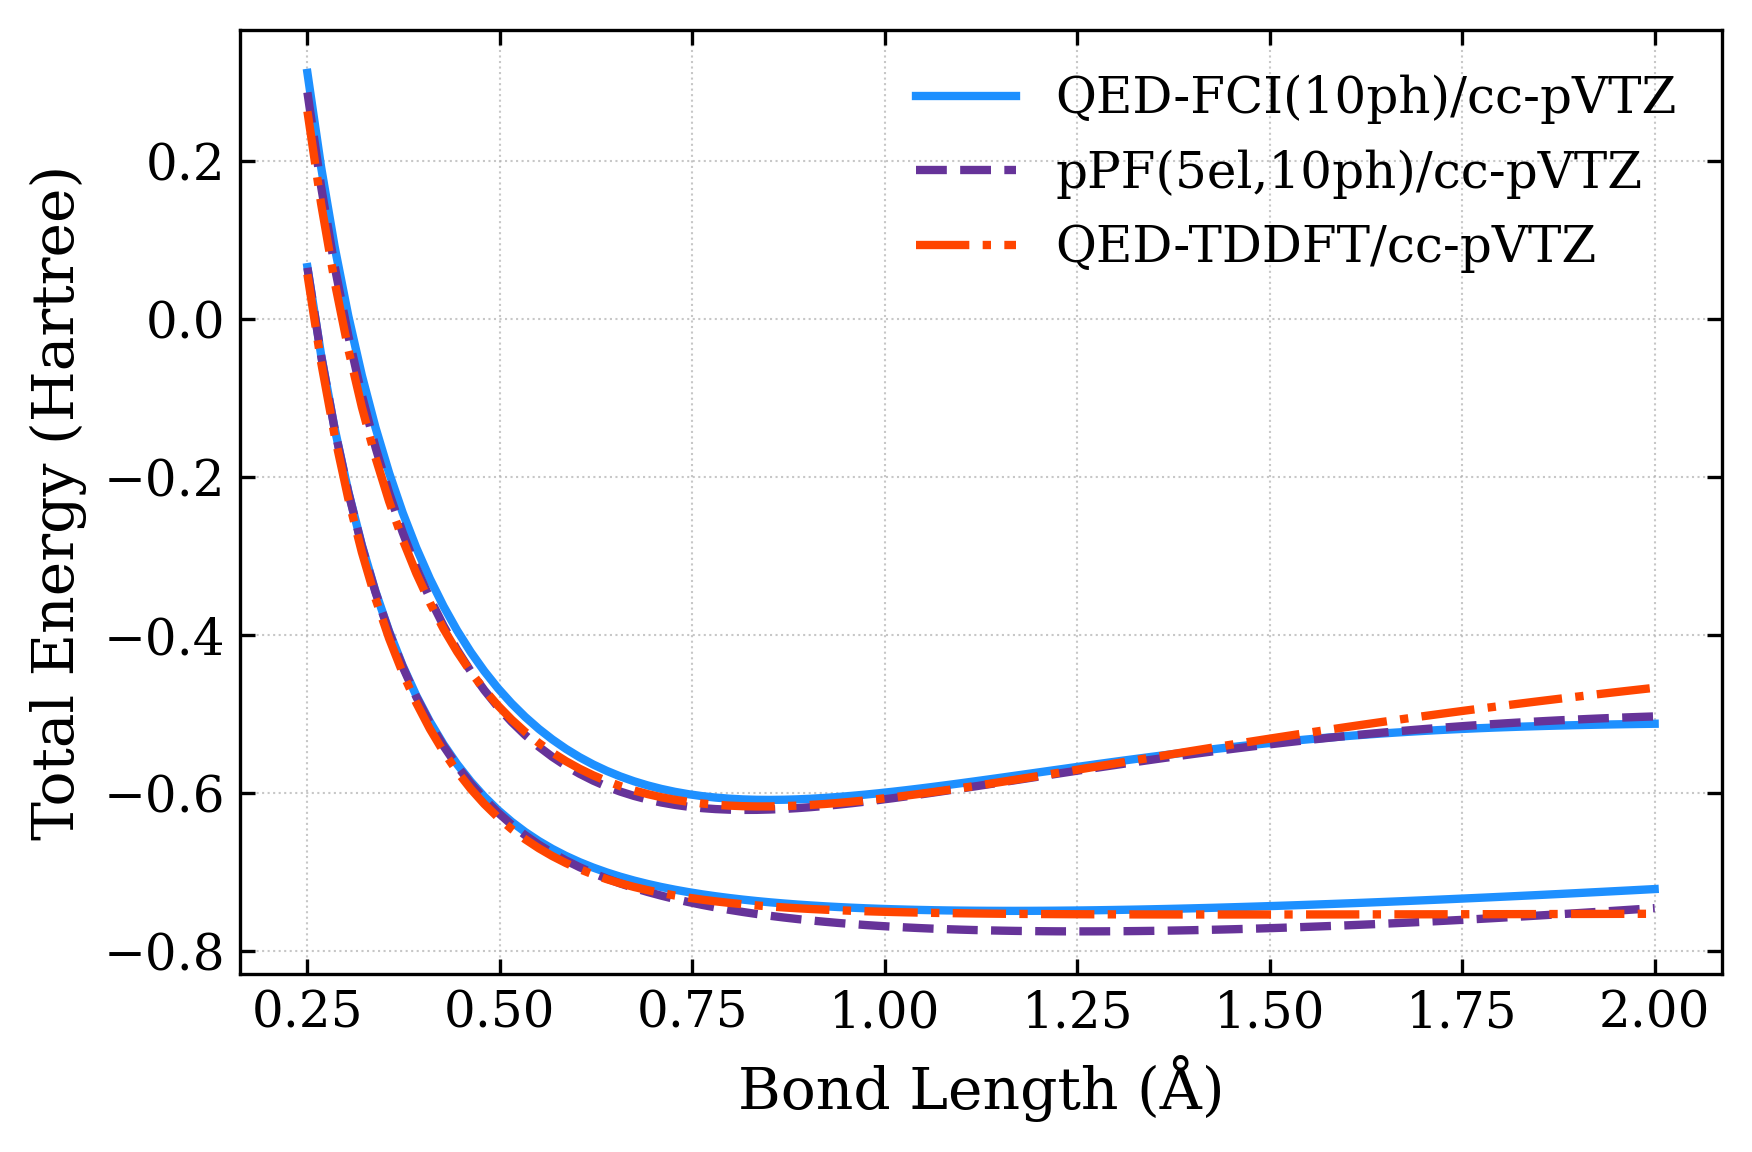

In [7]:
import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,  # Set to True if using LaTeX rendering
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

# Define styles
styles = {
    "QED-FCI": {"color": color4, "linestyle": "-"}, #"marker": "o", "markerfacecolor":color4},
    "PQED": {"color": color3, "linestyle": "--"}, # "marker": "s", "markerfacecolor":"none"},
    "QED-TDDFT": {"color": color5, "linestyle": "-."} #, "marker": "^", "markerfacecolor":"none"},
}



fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[0][:,  0 ],
        label=r"FCI/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[0][:,  2 ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, tddft_S0,
        label=r"TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_S1,
        **styles["QED-TDDFT"])


# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_cavity_free_states_vs_bondlength.png", format='png', dpi=600)

# Show the plot
plt.show()

## lz - 0.01

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p01,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p01,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()


## lz - 0.05

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p05,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p05,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()

### lz = 0.1


fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_lp_index ],
        label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_up_index ],
        **styles["QED-FCI"])

ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_lp_index ],
        label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_up_index ],
        **styles["PQED"])

ax.plot(bondlength_scan_vals, tddft_lp_lz_p1,
        label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p1,
        **styles["QED-TDDFT"])




# Customize
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Save to file
fig.tight_layout()
#fig.savefig("qed_methods_energy_vs_bondlength.pdf", format='pdf')
#fig.savefig("h2_pol_lz_0p01.png", format='png', dpi=600)

# Show the plot
plt.show()




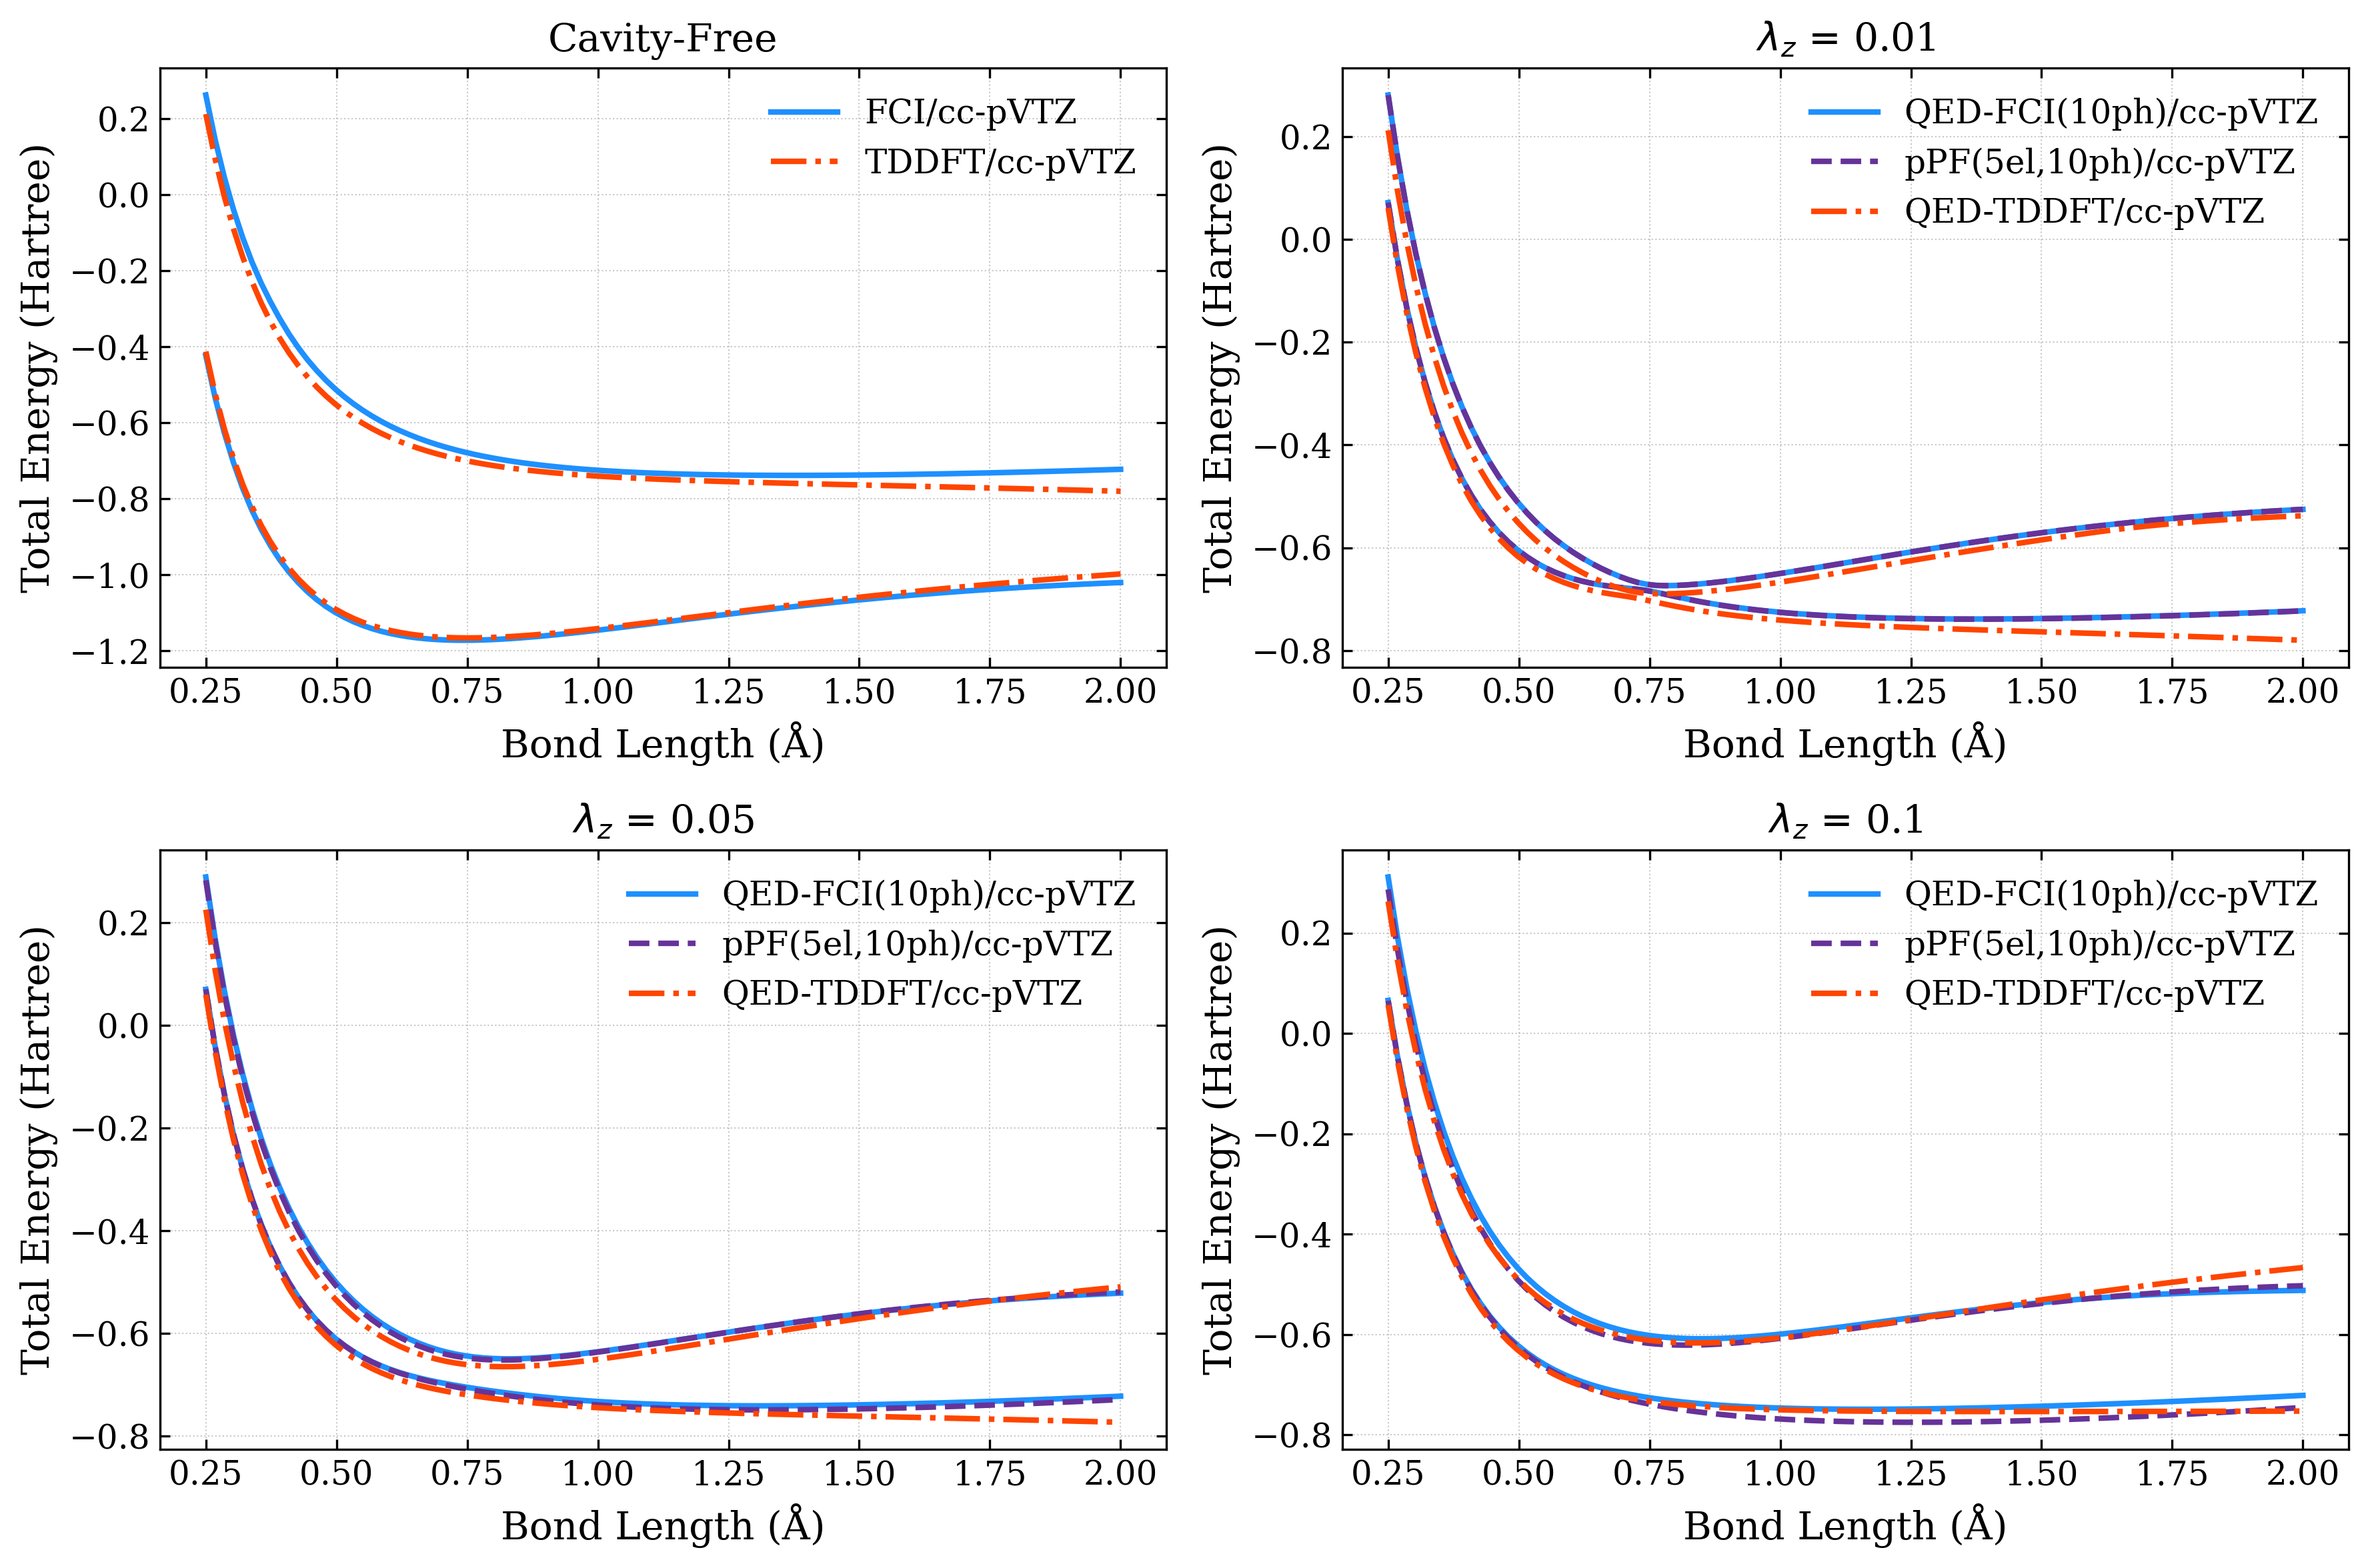

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use a professional font and improve overall aesthetics
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "lines.linewidth": 2,
    "lines.markersize": 6,
})

# Colors and styles
color3 = "rebeccapurple"
color2 = "salmon"
color1 = "forestgreen"
color4 = "dodgerblue"
color5 = "orangered"

styles = {
    "QED-FCI": {"color": color4, "linestyle": "-"},
    "PQED": {"color": color3, "linestyle": "--"},
    "QED-TDDFT": {"color": color5, "linestyle": "-."}
}

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

### Panel 1: Cavity-free
ax = axes[0]
ax.plot(bondlength_scan_vals, qed_ci[0][:, 0], label=r"FCI/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[0][:, 2], **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, tddft_S0, label=r"TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_S1, **styles["QED-TDDFT"])
ax.set_title("Cavity-Free")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

### Panel 2: lz = 0.01
ax = axes[1]
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[1][:, ci_up_index], **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_lp_index], label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[1][:, pqed_minimal_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p01, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p01, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.01")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

### Panel 3: lz = 0.05
ax = axes[2]
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[5][:, ci_up_index], **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_lp_index], label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[5][:, pqed_minimal_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p05, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p05, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.05")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

### Panel 4: lz = 0.1
ax = axes[3]
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_lp_index], label=r"QED-FCI(10ph)/cc-pVTZ", **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, qed_ci[10][:, ci_up_index], **styles["QED-FCI"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_lp_index], label=r"pPF(5el,10ph)/cc-pVTZ", **styles["PQED"])
ax.plot(bondlength_scan_vals, pqed_minimal[10][:, pqed_minimal_up_index], **styles["PQED"])
ax.plot(bondlength_scan_vals, tddft_lp_lz_p1, label=r"QED-TDDFT/cc-pVTZ", **styles["QED-TDDFT"])
ax.plot(bondlength_scan_vals, tddft_up_lz_p1, **styles["QED-TDDFT"])
ax.set_title("$\lambda_z$ = 0.1")
ax.set_xlabel("Bond Length (Å)")
ax.set_ylabel("Total Energy (Hartree)")
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax.legend(frameon=False, loc='best')
ax.tick_params(direction='in', top=True, right=True)

# Layout and save/show
fig.tight_layout()
# fig.savefig("qed_methods_4panel.pdf", format="pdf")
fig.savefig("h2_pes_4panel.png", format="png", dpi=600)
plt.show()


# This block will compute the Franck-Condon Limits

In [ ]:
# qed-tddft
fcf_limit_s0_lp_qedtddft = []
fcf_limit_s0_up_qedtddft = []

HRs_S0_lp_qedtddft =[]
HRs_S0_up_qedtddft =[]



# tddft S0 and S1
#tddft_S0, tddft_S1

# polariton states
# tddft_lp_lz_p01, tddft_up_lz_p01, tddft_lp_lz_p05, tddft_up_lz_p05, tddft_lp_lz_p1, tddft_up_lz_p1
# handle qed-tddft fcf separately because the PES are organized differently

# cavity free 
_temp = get_fcf_matrix(tddft_S0, tddft_S1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))


# lz = 0.01
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p01,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p01,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

# fill in zeros for lz = 0.02, 0.03, 0.04
for i in range(3):
    fcf_limit_s0_lp_qedtddft.append(0.0)
    fcf_limit_s0_up_qedtddft.append(0.0)

# lz = 0.05
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p05,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p05,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

# fill in zeros for lz = 0.06, 0.07, 0.08, 0.09
for i in range(4):
    fcf_limit_s0_lp_qedtddft.append(0.0)
    fcf_limit_s0_up_qedtddft.append(0.0)

# lz = 0.1
_temp = get_fcf_matrix(tddft_S0, tddft_lp_lz_p1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_lp_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))
_temp = get_fcf_matrix(tddft_S0, tddft_up_lz_p1,  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
fcf_limit_s0_up_qedtddft.append((_temp[0, 0]/(1 - _temp[0,0])))

fcf_limit_s0_lp_qedtddft = np.array(fcf_limit_s0_lp_qedtddft)
fcf_limit_s0_up_qedtddft = np.array(fcf_limit_s0_up_qedtddft)




In [ ]:
print(indices)
print(fcf_limit_s0_up_qedtddft[indices])
print(fcf_limit_s0_lp_qedtddft[indices])

In [ ]:
#calculate Huang Rhys, FC-Limit between S0 and LP and S0 and UP


np.set_printoptions(precision = 3)
# qed-ci
fcf_limit_s0_lp_ci = []
fcf_limit_s0_up_ci = []


# pqed
fcf_limit_s0_lp_pqed = []
fcf_limit_s0_up_pqed = []

# pqed minimal 
fcf_limit_s0_lp_pqed_minimal = []
fcf_limit_s0_up_pqed_minimal = []

# qed-ci
HRs_S0_lp_ci =[]
HRs_S0_up_ci = []


# pqed
HRs_S0_lp_pqed =[]
HRs_S0_up_pqed= []

# pqed minimal
HRs_S0_lp_pqed_minimal =[]
HRs_S0_up_pqed_minimal = []



index_pes = 0

for lambda_val in lambda_values:
    print("Lambda value:", lambda_val)


    #s0 to LP
    fcf_s0_lp = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_ci.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_ci.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )


    fcf_s0_lp = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_pqed.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )


    fcf_s0_lp = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_pqed_minimal.append(( fcf_s0_lp[0,0] / (1 - fcf_s0_lp[0,0]) ) )
    fcf_limit_s0_up_pqed_minimal.append(( fcf_s0_up[0,0] / (1 - fcf_s0_up[0,0]) ) )



        #s0 to LP
    
    HRs_S0_lp_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_ci.append(calculate_HR(qed_ci[index_pes][:,  0 ], qed_ci[index_pes][:, ci_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed.append(calculate_HR(pqed[index_pes][:,  0 ], pqed[index_pes][:, pqed_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))

    HRs_S0_lp_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_pqed_minimal.append(calculate_HR(pqed_minimal[index_pes][:,  0 ], pqed_minimal[index_pes][:, pqed_minimal_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))


    index_pes+=1

fcf_limit_s0_lp_ci = np.array(fcf_limit_s0_lp_ci)
fcf_limit_s0_up_ci =np.array(fcf_limit_s0_up_ci)

fcf_limit_s0_lp_pqed = np.array(fcf_limit_s0_lp_pqed)
fcf_limit_s0_up_pqed = np.array(fcf_limit_s0_up_pqed)

fcf_limit_s0_lp_pqed_minimal = np.array(fcf_limit_s0_lp_pqed_minimal )
fcf_limit_s0_up_pqed_minimal = np.array(fcf_limit_s0_up_pqed_minimal)


HRs_S0_lp_ci =np.array(HRs_S0_lp_ci )
HRs_S0_up_ci = np.array(HRs_S0_up_ci)

HRs_S0_lp_pqed =np.array(HRs_S0_lp_pqed)
HRs_S0_up_pqed= np.array(HRs_S0_up_pqed)

HRs_S0_lp_pqed_minimal =np.array(HRs_S0_lp_pqed_minimal)
HRs_S0_up_pqed_minimal = np.array(HRs_S0_up_pqed_minimal )


# plt.plot(fcf_limit_s0_lp_ci)
# plt.plot(fcf_limit_s0_lp_pqed)
# plt.plot(fcf_limit_s0_lp_pqed_minimal)
# plt.plot(fcf_limit_s0_up_ci)
# plt.plot(fcf_limit_s0_up_pqed)
# plt.plot(fcf_limit_s0_up_pqed_minimal)
# plt.show()


# plt.plot(HRs_S0_up_pqed_minimal)
# plt.plot(HRs_S0_lp_pqed_minimal)
# plt.plot(HRs_S0_up_pqed)
# plt.plot(HRs_S0_lp_pqed)
# plt.plot(HRs_S0_up_ci)
# plt.plot(HRs_S0_lp_ci)
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
TDDFTCOLOUR = "orange"

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]

barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.savefig("FC_Limit_S0_LP.png", dpi=300)
plt.show()





# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]

fcl_tddft = fcf_limit_s0_up_qedtddft[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]



# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend()
plt.savefig("FC_Limit_S0_UP.png", dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR = "royalblue"
TDDFTCOLOUR = "orange"

lambda_value_to_plot = [0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, element))[0][0] for element in lambda_value_to_plot]

# Set up subplots in horizontal layout
fig, axs = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# ---------- LEFT PLOT: S0 → Lower Polariton ----------
fcl_qedci = fcf_limit_s0_lp_ci[indices]
fcl_pqed = fcf_limit_s0_lp_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]

barWidth = 0.2
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

axs[0].bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
axs[0].bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
axs[0].bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
axs[0].bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')

axs[0].set_xlabel('Coupling Strength (a.u.)', fontweight='bold')
axs[0].set_ylabel('Franck-Condon Limit', fontweight='bold')
axs[0].set_xticks([r + 1.5 * barWidth for r in range(len(lambda_value_to_plot))])
axs[0].set_xticklabels(lambda_value_to_plot)
axs[0].set_yscale('log')
#axs[0].legend(loc='upper left')
axs[0].set_title("S$_0$ → Lower Polariton")

# ---------- RIGHT PLOT: S0 → Upper Polariton ----------
lambda_value_to_plot = [0.00, 0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, element))[0][0] for element in lambda_value_to_plot]
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
fcl_qedci = fcf_limit_s0_up_ci[indices]
fcl_pqed = fcf_limit_s0_up_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_up_qedtddft[indices]

axs[1].bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
axs[1].bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
axs[1].bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
axs[1].bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')

axs[1].set_xlabel('Coupling Strength (a.u.)', fontweight='bold')
axs[1].set_ylabel('Franck-Condon Limit', fontweight='bold')
axs[1].set_xticks([r + 1.5 * barWidth for r in range(len(lambda_value_to_plot))])
axs[1].set_xticklabels(lambda_value_to_plot)
axs[1].set_yscale('log')
#axs[1].legend(loc='upper left')
axs[1].set_title("S$_0$ → Upper Polariton")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Save and show combined plot
plt.savefig("FC_Limits_Combined.png", dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR = "royalblue"
TDDFTCOLOUR = "orange"

lambda_value_to_plot = [0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, element))[0][0] for element in lambda_value_to_plot]

# Set up subplots in vertical layout
fig, axs = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True)

barWidth = 0.2
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# ---------- TOP PLOT: S0 → Lower Polariton ----------
fcl_qedci = fcf_limit_s0_lp_ci[indices]
fcl_pqed = fcf_limit_s0_lp_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_lp_qedtddft[indices]

axs[0].bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
axs[0].bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
axs[0].bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
axs[0].bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')

#axs[0].set_xlabel('Coupling Strength (a.u.)', fontweight='bold')
axs[0].set_ylabel('Franck-Condon Limit', fontweight='bold')
axs[0].set_xticks([r + 1.5 * barWidth for r in range(len(lambda_value_to_plot))])
axs[0].set_xticklabels(lambda_value_to_plot)
axs[0].set_yscale('log')
#axs[0].legend(loc='upper left')
#axs[1].set_title("S$_0$ → Lower Polariton")

# ---------- BOTTOM PLOT: S0 → Upper Polariton ----------
lambda_value_to_plot = [0.0, 0.01, 0.05, 0.1]
indices = [np.where(np.isclose(lambda_values, element))[0][0] for element in lambda_value_to_plot]
barWidth = 0.2
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fcl_qedci = fcf_limit_s0_up_ci[indices]
fcl_pqed = fcf_limit_s0_up_pqed[indices]
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]
fcl_tddft = fcf_limit_s0_up_qedtddft[indices]

axs[1].bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
axs[1].bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
axs[1].bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
axs[1].bar(r4, fcl_tddft, color=TDDFTCOLOUR, width=barWidth, edgecolor='white', label='QED-TDDFT')

axs[1].set_xlabel('Coupling Strength (a.u.)', fontweight='bold')
axs[1].set_ylabel('Franck-Condon Limit', fontweight='bold')
axs[1].set_xticks([r + 1.5 * barWidth for r in range(len(lambda_value_to_plot))])
axs[1].set_xticklabels(lambda_value_to_plot)
axs[1].set_yscale('log')
axs[1].legend(loc='upper left')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#axs[1].set_title("S$_0$ → Upper Polariton")

# Save and show the combined vertical plot
plt.savefig("H2_FC_Limits_Vertical.png", dpi=300)
plt.show()


In [ ]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Times New Roman'], 'size': 14})

CICOLOUR = "rebeccapurple"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
#FCICOLOUR = "salmon"
#PQEDPROJCOLOUR = "green"
#PQEDCOLOUR = "royalblue"
#FCIPROJCOLOUR = "rebeccapurple"
#FCIPROJCOLOUR2 = 'darkorchid'


import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_lp_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()




#CICOLOUR = "salmon"
#PQEDCOLOUR = "green"
#PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.01, 0.05, 0.1]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_up_pqed_minimal[indices]


barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-FCI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

In [ ]:
lighter_blue = '#ADD8E6'  # Light Blue
lighter_green = '#90EE90'  # Light Green
lighter_red = '#FFCCCB'  # Light Red (Pale Red)
lighter_blue = '#6495ED'  # Darker Blue
lighter_green = '#66CDAA'  # Darker Green
lighter_red = '#FF6F61'  # Darker Red


#change surface index here
surface_index = 0

# Your data loading and processing code

plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  0 ] , label = "S0 PQED MINIMAL", color=lighter_green)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_lp_index ] , label = "LP PQED MINIMAL", color=lighter_red)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_up_index], label = "UP PQED MINIMAL", color=lighter_blue)



# Plot PQED and QED-CI surfaces as you did before
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  0 ] , label = "S0 PQED", color='darkgreen')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_lp_index ] , label = "LP PQED", color='darkred')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_up_index], label = "UP PQED", color='darkblue')


plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  0], label = "S0 QED-CI", color='green')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:, ci_lp_index ], label = "LP QED-CI", color='red')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  ci_up_index ], label = "UP QED-CI", color='blue')

#get min and max for scaling vib wavefunctions; 

max_val = np.max(qed_ci[surface_index][:,  ci_up_index])
min_val = np.min(qed_ci[surface_index][:,  0 ])
diff = max_val - min_val


r_data = bondlength_scan_vals

# Define how many vibrational wavefunctions to plot
num_vibs_to_plot = 1

# Use spline interpolation to smooth the wavefunctions
spline_r_data = np.linspace(r_data[1], r_data[-1], 1000)



r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color=lighter_green, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color=lighter_red, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color=lighter_blue, alpha=0.3)







r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color='darkgreen', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color='darkred', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='darkblue', alpha=0.3)






r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,   ci_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,ci_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Similarly, plot and fill for the decluttered surfaces
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 QED-CI (with some alpha for transparency)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i] , color='green', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP QED-CI
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i],  np.ones_like(spline_r_data) *lp_vals[i],color='red', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP QED-CI
    plt.fill_between(spline_r_data, (up_wavefunction**2 * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='blue', alpha=0.3)

# # Display the legend and show the plot
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length (angstrom)")
plt.legend()
plt.show()